In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2025-10-10 19:34:58.590437: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-10 19:34:58.627281: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 19:34:59.710963: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


2.20.0


In [2]:
%load_ext tensorboard

In [3]:
a = tf.constant(3.0)
b = tf.constant(5.0)

2025-10-10 19:35:01.023503: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
c = a*b

In [5]:
print(c)

tf.Tensor(15.0, shape=(), dtype=float32)


In [6]:
c1 = tf.constant(5, name = 'x')
c2 = tf.constant(6.0, tf.float32, name = 'y')
c3 = tf.constant(7.0, tf.float32, name = 'z')

In [7]:
print('c1: ', c1)
print('c2: ', c2)
print('c3: ', c3)

c1:  tf.Tensor(5, shape=(), dtype=int32)
c2:  tf.Tensor(6.0, shape=(), dtype=float32)
c3:  tf.Tensor(7.0, shape=(), dtype=float32)


In [8]:
op1 = tf.multiply(c3,c2)
op2 = tf.add(c2,c3)

In [9]:
print('op1: ', op1)
print('op2: ', op2)

op1:  tf.Tensor(42.0, shape=(), dtype=float32)
op2:  tf.Tensor(13.0, shape=(), dtype=float32)


In [10]:
tensor = tf.convert_to_tensor(5.0, tf.float32)
print('tensor: ', tensor)

tensor:  tf.Tensor(5.0, shape=(), dtype=float32)


In [11]:
a3dim = np.array([[1, 2]])
b3dim = np.array([[1], [2]])

In [12]:
tf_a3dim = tf.convert_to_tensor(a3dim, dtype=tf.float64)
tf_b3dim = tf.convert_to_tensor(b3dim, dtype=tf.float64)

In [13]:
result = tf.matmul(tf_a3dim, tf_b3dim)
print(result)

tf.Tensor([[5.]], shape=(1, 1), dtype=float64)


In [14]:
w = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

In [15]:
x = np.arange(1,5)

tf.Tensor([0.         0.3        0.6        0.90000004], shape=(4,), dtype=float32)


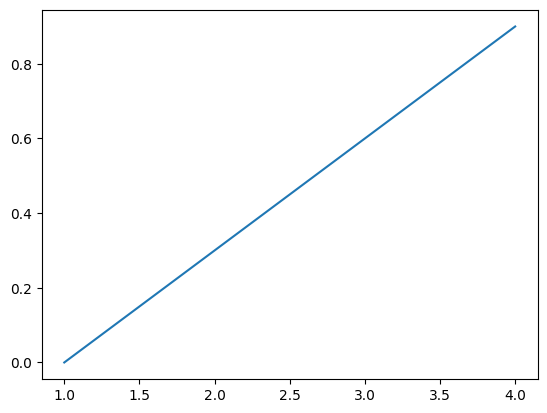

In [16]:
y = w * x + b

print(y)

plt.plot(x,y)
plt.show()

In [17]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

In [18]:
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [19]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [21]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [22]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [23]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [24]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [25]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(15, name="a")
    b = tf.constant(30.0)
    c = tf.constant(30.0)
    s = tf.Variable(2, name="scalar")
    m = tf.Variable([[1, 2], [3, 4]], name="matrix") 
    W = tf.Variable(tf.zeros([784,10]))
    assert c.graph is g

In [26]:
# Define a Python function.
def a_regular_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

# `a_function_that_uses_a_graph` is a TensorFlow `Function`.
a_function_that_uses_a_graph = tf.function(a_regular_function)

# Make some tensors.
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
# Call a `Function` like a Python function.
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)
tf_function_value

array([[12.]], dtype=float32)

In [27]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

# Use the decorator to make `outer_function` a `Function`.
@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

# Note that the callable will create a graph that
# includes `inner_function` as well as `outer_function`.
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [28]:
def simple_relu(x):
    if tf.greater(x, 0):
        return x
    else:
        return 0

# `tf_simple_relu` is a TensorFlow `Function` that wraps `simple_relu`.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())


First branch, with graph: 1
Second branch, with graph: 0


In [29]:
print(tf.autograph.to_code(simple_relu))


def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            do_return, retval_ = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_body

In [30]:
print(tf_simple_relu.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "then_branch"
    value {
      func {
        name: "cond_true_83"
      }
    }
  }
  attr {
    key: "output_shapes"
    value {
      list {
        shape {
        }
        shape {
        }
      }
    }
  }
  attr {
    key: "else_branch"
    

In [31]:
@tf.function
def my_relu(x):
      return tf.maximum(0., x)

# `my_relu` creates new graphs as it observes more signatures.
print(my_relu(tf.constant(5.5)))
print(my_relu([1, -1]))
print(my_relu(tf.constant([3., -3.])))


tf.Tensor(5.5, shape=(), dtype=float32)
tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor([3. 0.], shape=(2,), dtype=float32)


In [32]:
tf.io.write_graph(g, 'logs/tf-core-api', 'example-graph.pb', as_text=False)
tf.io.write_graph(g, 'logs/tf-core-api', 'example-graph.pbtxt')

/home/has/sources/components/setmy.info/submodules/setmy-info.github.io/src/site/markdown/ai/.venv/lib/python3.13/site-packages/google/protobuf/text_format.py:660: UserWarning: float_format is deprecated for text_format. This will turn into error in 7.34.0, please remove it before that.
  warnings.warn(


'logs/tf-core-api/example-graph.pbtxt'

In [33]:
tensorboard --logdir logs/tf-core-api